File to run PCA on the simulation data using a python library rather than ptraj with PCs calculated just using the GLU simulation data. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load in the simulation data (every 10 frames)
traj_new = []
traj_new.append(md.load_netcdf("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/mdcrd/VCBC-A3F_GLU_mut_sims1-8_first300_noBox.mdcrd", 
                          top="/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/VCBC-A3F_GLU_mut_nowat.prmtop", stride=10))
traj_new.append(md.load_netcdf("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_sims1-8_first300_noBox.mdcrd", 
                          top="/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_nowat.prmtop", stride=10))

In [3]:
starting_struct = md.load_pdb("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_tleap.pdb")

In [4]:
traj_new

[<mdtraj.Trajectory with 48000 frames, 12053 atoms, 747 residues, without unitcells at 0x15541314fa10>,
 <mdtraj.Trajectory with 48000 frames, 12060 atoms, 747 residues, without unitcells at 0x1554131e00e0>]

In [5]:
# Remove atoms that are not a part of the backbone
traj_new[0].atom_slice(traj_new[0].topology.select('backbone'), inplace=True)
traj_new[1].atom_slice(traj_new[1].topology.select('backbone'), inplace=True)
starting_struct.atom_slice(traj_new[1].topology.select('backbone'), inplace=True)

<mdtraj.Trajectory with 1 frames, 2968 atoms, 178 residues, without unitcells at 0x15541314fad0>

In [6]:
# # align the trajectories
traj_new[1].superpose(traj_new[0])
traj_new[0].superpose(traj_new[0])
starting_struct.superpose(traj_new[0])

<mdtraj.Trajectory with 1 frames, 2968 atoms, 178 residues, without unitcells at 0x15541314fad0>

In [7]:
# Extract the x,y,z coordinates fromt the trajectory objects
coordinatesGLU = traj_new[0].xyz
coordinatesWT = traj_new[1].xyz
Startcoordinates = starting_struct.xyz

print(coordinatesGLU.shape, coordinatesWT.shape, Startcoordinates.shape)

(48000, 2968, 3) (48000, 2968, 3) (1, 2968, 3)


In [8]:
train_data = coordinatesGLU

print(train_data.shape)  

train_data = train_data[::]

(48000, 2968, 3)


In [9]:
# Flatten to (n_frames, n_atoms * 3)

train_data = train_data.reshape(train_data.shape[0], -1) 
start_struct_data = Startcoordinates.reshape(Startcoordinates.shape[0], -1)
print(train_data.shape)

(48000, 8904)


In [10]:
train_data

array([[ 2.7646387,  4.792783 , 11.494975 , ...,  4.0472684,  3.3697793,
        14.09084  ],
       [ 2.735433 ,  4.787917 , 11.636822 , ...,  4.160372 ,  3.1476872,
        14.345175 ],
       [ 2.780947 ,  4.8121715, 11.521578 , ...,  4.199376 ,  3.5639646,
        14.124228 ],
       ...,
       [ 2.751956 ,  5.3357615, 12.39909  , ...,  4.059275 ,  3.4975405,
        14.061519 ],
       [ 2.6585064,  5.3505015, 12.359807 , ...,  4.01244  ,  3.5841088,
        14.115293 ],
       [ 2.7049773,  5.14951  , 12.501477 , ...,  4.104882 ,  3.494835 ,
        14.178824 ]], dtype=float32)

In [11]:
# scaler = StandardScaler()
# train_data = scaler.fit_transform(train_data)
# start_struct_data = scaler.transform(start_struct_data)

In [12]:
train_data

array([[ 2.7646387,  4.792783 , 11.494975 , ...,  4.0472684,  3.3697793,
        14.09084  ],
       [ 2.735433 ,  4.787917 , 11.636822 , ...,  4.160372 ,  3.1476872,
        14.345175 ],
       [ 2.780947 ,  4.8121715, 11.521578 , ...,  4.199376 ,  3.5639646,
        14.124228 ],
       ...,
       [ 2.751956 ,  5.3357615, 12.39909  , ...,  4.059275 ,  3.4975405,
        14.061519 ],
       [ 2.6585064,  5.3505015, 12.359807 , ...,  4.01244  ,  3.5841088,
        14.115293 ],
       [ 2.7049773,  5.14951  , 12.501477 , ...,  4.104882 ,  3.494835 ,
        14.178824 ]], dtype=float32)

In [ ]:
# PCA tutorial used : https://www.geeksforgeeks.org/principal-component-analysis-pca/

In [13]:
n_components=10
pca = PCA(n_components=n_components)
pca.fit(train_data)


x_pca = pca.transform(train_data)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [14]:
df_pca1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,5.421677,2.209030,1.843536,-2.318022,-2.210684,-0.828344,6.958633,8.615913,-1.762215,-2.746273
1,9.448769,1.856636,2.277958,-3.479233,-3.461753,-0.439747,7.659153,8.801243,-2.684490,-3.514259
2,9.523300,1.425587,2.974358,-3.715749,-3.646676,-0.644405,7.741938,8.935047,-3.065453,-3.222845
3,10.846642,-2.020042,4.123993,-4.623621,-4.361599,-0.375881,7.869372,8.690422,-1.995495,-2.579403
4,11.513145,-2.062340,3.560379,-4.503584,-4.868207,-0.638203,7.862070,8.664818,-2.011009,-2.754438
...,...,...,...,...,...,...,...,...,...,...
47995,6.101555,3.081779,-3.512222,-8.204560,-3.331310,1.935215,-7.027941,-2.279449,0.402260,-1.658195
47996,6.768162,4.445744,-3.706818,-7.615748,-3.336300,1.583677,-7.080313,-2.851505,-1.147629,-2.989265
47997,6.078667,4.910728,-3.656952,-7.030370,-3.089850,2.804482,-8.124868,-2.753981,-0.406227,-1.952780
47998,4.523727,4.772583,-2.805794,-7.431375,-2.615516,3.341173,-8.276331,-3.151917,-0.108463,-1.747360


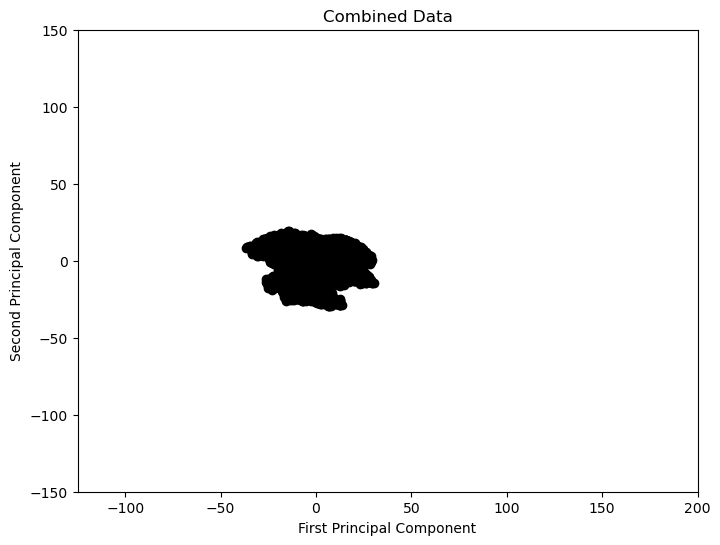

In [15]:
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c='black')

plt.xlim([-125,200])
plt.ylim([-150,150])
plt.title('Combined Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [16]:
GLU_data = coordinatesGLU.reshape(coordinatesGLU.shape[0], -1) 
WT_data = coordinatesWT.reshape(coordinatesWT.shape[0], -1) 

In [17]:
# GLU_data = scaler.transform(GLU_data)
# WT_data = scaler.transform(WT_data)

In [18]:
GLU_pca = pca.transform(GLU_data)

# Create the dataframe
df_pca_GLU = pd.DataFrame(GLU_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [19]:
df_pca_GLU

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,5.421677,2.209030,1.843536,-2.318022,-2.210684,-0.828344,6.958633,8.615913,-1.762215,-2.746273
1,9.448769,1.856636,2.277958,-3.479233,-3.461753,-0.439747,7.659153,8.801243,-2.684490,-3.514259
2,9.523300,1.425587,2.974358,-3.715749,-3.646676,-0.644405,7.741938,8.935047,-3.065453,-3.222845
3,10.846642,-2.020042,4.123993,-4.623621,-4.361599,-0.375881,7.869372,8.690422,-1.995495,-2.579403
4,11.513145,-2.062340,3.560379,-4.503584,-4.868207,-0.638203,7.862070,8.664818,-2.011009,-2.754438
...,...,...,...,...,...,...,...,...,...,...
47995,6.101555,3.081779,-3.512222,-8.204560,-3.331310,1.935215,-7.027941,-2.279449,0.402260,-1.658195
47996,6.768162,4.445744,-3.706818,-7.615748,-3.336300,1.583677,-7.080313,-2.851505,-1.147629,-2.989265
47997,6.078667,4.910728,-3.656952,-7.030370,-3.089850,2.804482,-8.124868,-2.753981,-0.406227,-1.952780
47998,4.523727,4.772583,-2.805794,-7.431375,-2.615516,3.341173,-8.276331,-3.151917,-0.108463,-1.747360


In [20]:
WT_pca = pca.transform(WT_data)

# Create the dataframe
df_pca_WT = pd.DataFrame(WT_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [21]:
df_pca_WT

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,6.667152,2.353127,9.953342,-5.291125,-5.486601,-2.248610,8.574847,3.745888,-3.629654,-2.816010
1,6.079819,3.222939,9.367264,-5.547781,-5.724721,-3.392935,9.030080,3.783890,-4.783043,-3.758907
2,8.496765,3.275146,7.260395,-4.379379,-5.165545,-2.693512,8.188252,4.542141,-4.803108,-3.575272
3,7.890388,4.384995,7.437107,-3.069054,-3.357103,-2.306581,8.002184,4.636681,-3.585262,-5.269491
4,5.921146,5.942719,8.606838,-1.769726,-3.095239,-2.067631,8.360517,4.794037,-3.425945,-6.020206
...,...,...,...,...,...,...,...,...,...,...
47995,10.214481,-1.106323,9.201710,2.924998,4.069388,-3.401375,1.672173,-4.427242,-2.421486,5.950329
47996,10.735279,-0.984226,9.061317,2.501561,3.850463,-3.417900,1.791580,-3.899788,-3.012600,4.848587
47997,10.447628,-1.134392,10.298805,3.527150,4.667352,-4.407408,1.109940,-4.498205,-3.037174,4.119953
47998,10.030888,-1.812496,9.227448,3.589358,4.774002,-3.942699,0.443100,-4.180714,-3.137173,4.617519


In [22]:
struct_pca = pca.transform(start_struct_data)

# Create the dataframe
df_pca_struct = pd.DataFrame(struct_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [23]:
df_pca_struct

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,35.48307,-22.393009,64.540634,-3.783142,0.243551,20.240059,21.103844,-22.9846,29.103909,-38.847164


### Classic figures

In [24]:
PC1min = min(min(GLU_pca[:, 0]), min(WT_pca[:, 0])) - 25
PC1max = max(max(GLU_pca[:, 0]), max(WT_pca[:, 0])) + 25
PC2min = min(min(GLU_pca[:, 1]), min(WT_pca[:, 1])) - 25
PC2max = max(max(GLU_pca[:, 1]), max(WT_pca[:, 1])) + 25
PC3min = min(min(GLU_pca[:, 2]), min(WT_pca[:, 2])) - 25
PC3max = max(max(GLU_pca[:, 2]), max(WT_pca[:, 2])) + 25
PC4min = min(min(GLU_pca[:, 3]), min(WT_pca[:, 3])) - 25
PC4max = max(max(GLU_pca[:, 3]), max(WT_pca[:, 3])) + 25

Text(0, 0.5, 'PC2')

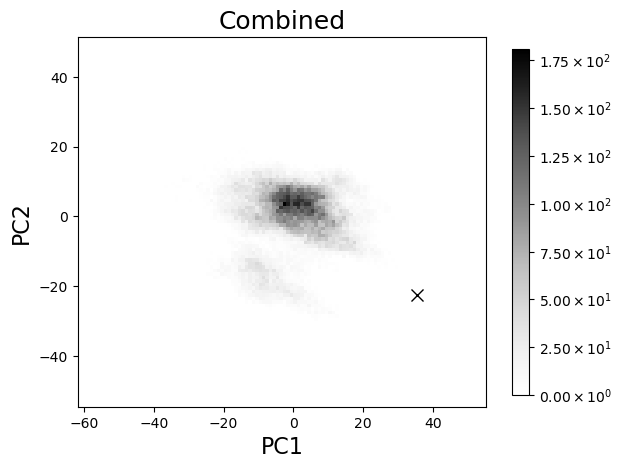

In [25]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca1['PC1'], df_pca1['PC2'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min, PC2max])
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('Combined', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC2')

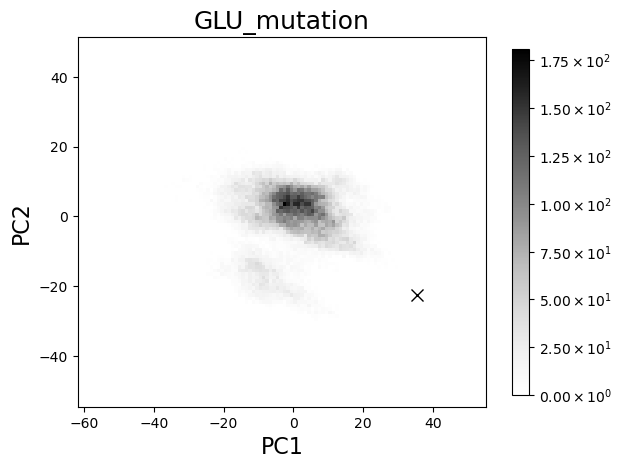

In [26]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca_GLU['PC1'], df_pca_GLU['PC2'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min, PC2max])
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('GLU_mutation', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC2')

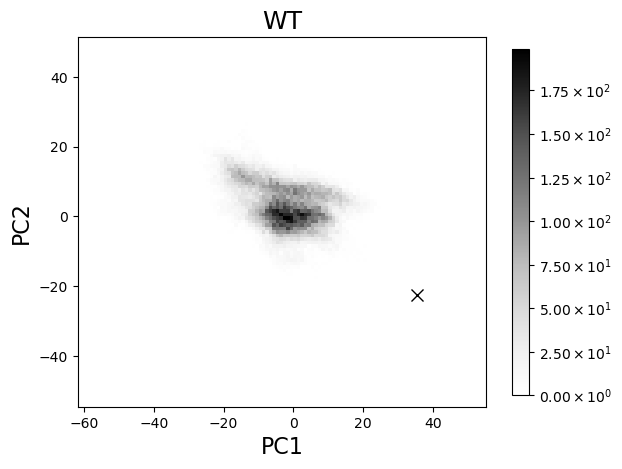

In [27]:
binedges = np.arange(-550,550,1) # create array for bin edges

WT_fig = np.histogram2d(df_pca_WT['PC1'], df_pca_WT['PC2'], 
                         bins=binedges)
max_shade = WT_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC,PC2_VCBC,WT_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min, PC2max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('WT', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC4')

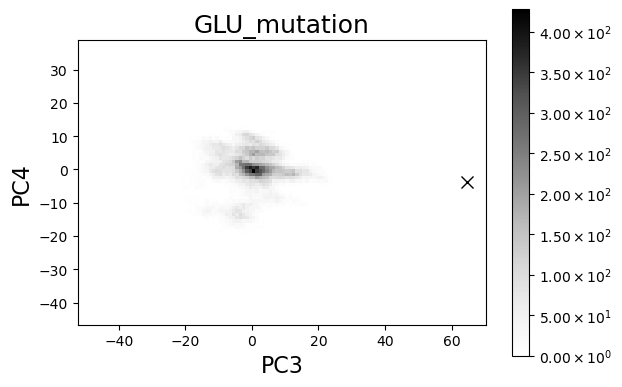

In [36]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca_GLU['PC3'], df_pca_GLU['PC4'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 

plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC3min, PC3max+20])
plt.ylim([PC4min, PC4max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC3"][0], y = df_pca_struct["PC4"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('GLU_mutation', size= 18) 
plt.xlabel('PC3',size= 16) 
plt.ylabel('PC4',size= 16)

Text(0, 0.5, 'PC4')

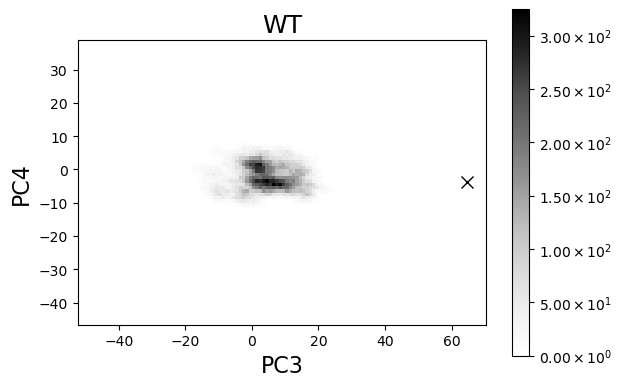

In [37]:
binedges = np.arange(-50,45,1) # create array for bin edges

WT_fig = np.histogram2d(df_pca_WT['PC3'], df_pca_WT['PC4'], 
                         bins=binedges)
max_shade = WT_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC,PC2_VCBC,WT_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC3min, PC3max+20])
plt.ylim([PC4min, PC4max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC3"][0], y = df_pca_struct["PC4"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('WT', size= 18) 
plt.xlabel('PC3',size= 16) 
plt.ylabel('PC4',size= 16)

In [38]:
df_pca_GLU.std()

PC1     9.465097
PC2     8.259787
PC3     7.320139
PC4     5.858588
PC5     4.433419
PC6     4.345912
PC7     3.844184
PC8     3.483860
PC9     3.264088
PC10    3.042000
dtype: float32

In [39]:
df_pca_WT.std()

PC1     8.566767
PC2     5.998655
PC3     7.319420
PC4     3.805744
PC5     2.977272
PC6     3.287850
PC7     3.901385
PC8     2.664014
PC9     4.436001
PC10    3.621285
dtype: float32

In [40]:
df_pca_GLU.mean()

PC1    -0.000069
PC2     0.000029
PC3     0.000067
PC4    -0.000015
PC5    -0.000008
PC6    -0.000030
PC7    -0.000025
PC8     0.000025
PC9     0.000056
PC10   -0.000009
dtype: float32

In [41]:
df_pca_WT.mean()

PC1    -1.978412
PC2     3.078089
PC3     4.525193
PC4    -2.124331
PC5     0.061512
PC6    -1.865857
PC7     5.366171
PC8    -1.455836
PC9    -4.417511
PC10    3.117222
dtype: float32

In [43]:
#The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.
#Equal to n_components largest eigenvalues of the covariance matrix of X.
print (f" Amount of variance explained by top ten components: {pca.explained_variance_}")
print()

# Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
print (f" Percentage of variance explained by the top ten components: {pca.explained_variance_ratio_}")
print()

# returns a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.
# https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
print (f" Cumulative variance explained by the top ten components: {pca.explained_variance_ratio_.cumsum()}")

 Amount of variance explained by top ten components: [89.588066 68.223976 53.584454 34.32302  19.655224 18.88695  14.777732
 12.137266 10.654285  9.253758]

 Percentage of variance explained by the top ten components: [0.20784709 0.15828174 0.12431759 0.07963047 0.04560073 0.04381831
 0.0342848  0.02815883 0.02471827 0.02146901]

 Cumulative variance explained by the top ten components: [0.20784709 0.36612883 0.49044642 0.5700769  0.6156776  0.6594959
 0.69378066 0.7219395  0.7466578  0.7681268 ]


## P values

Adapted from "Permutation_PCA" notebook

In [44]:
GLU_pca = df_pca_GLU
WT_pca = df_pca_WT
pdb_PCA = df_pca_struct

In [45]:
GLU_Mean_std_PC1and2 = {"Simulation":["1","2","3","4","5","6","7","8"],
                    'Mean_PC1':[GLU_pca['PC1'][1:6000:10].mean(),
                    GLU_pca['PC1'][6001:12000:10].mean(),
                    GLU_pca['PC1'][12001:18000:10].mean(),
                    GLU_pca['PC1'][18001:24000:10].mean(),
                    GLU_pca['PC1'][24001:30000:10].mean(),
                    GLU_pca['PC1'][30001:36000:10].mean(),
                    GLU_pca['PC1'][36001:42000:10].mean(),
                    GLU_pca['PC1'][42001:48000:10].mean()], 
     'Variance_PC1':[GLU_pca['PC1'][1:6000:10].var(),
                    GLU_pca['PC1'][6001:12000:10].var(),
                    GLU_pca['PC1'][12001:18000:10].var(),
                    GLU_pca['PC1'][18001:24000:10].var(),
                    GLU_pca['PC1'][24001:30000:10].var(),
                    GLU_pca['PC1'][30001:36000:10].var(),
                    GLU_pca['PC1'][36001:42000:10].var(),
                    GLU_pca['PC1'][42001:48000:10].var()],
     'Mean_PC2': [GLU_pca['PC2'][1:6000:10].mean(),
                    GLU_pca['PC2'][6001:12000:10].mean(),
                    GLU_pca['PC2'][12001:18000:10].mean(),
                    GLU_pca['PC2'][18001:24000:10].mean(),
                    GLU_pca['PC2'][24001:30000:10].mean(),
                    GLU_pca['PC2'][30001:36000:10].mean(),
                    GLU_pca['PC2'][36001:42000:10].mean(),
                    GLU_pca['PC2'][42001:48000:10].mean()],
     "Variance_PC2":[GLU_pca['PC2'][1:6000:10].var(),
                    GLU_pca['PC2'][6001:12000:10].var(),
                    GLU_pca['PC2'][12001:18000:10].var(),
                    GLU_pca['PC2'][18001:24000:10].var(),
                    GLU_pca['PC2'][24001:30000:10].var(),
                    GLU_pca['PC2'][30001:36000:10].var(),
                    GLU_pca['PC2'][36001:42000:10].var(),
                    GLU_pca['PC2'][42001:48000:10].var()],
     'Mean_PC3': [GLU_pca['PC3'][1:6000:10].mean(),
                    GLU_pca['PC3'][6001:12000:10].mean(),
                    GLU_pca['PC3'][12001:18000:10].mean(),
                    GLU_pca['PC3'][18001:24000:10].mean(),
                    GLU_pca['PC3'][24001:30000:10].mean(),
                    GLU_pca['PC3'][30001:36000:10].mean(),
                    GLU_pca['PC3'][36001:42000:10].mean(),
                    GLU_pca['PC3'][42001:48000:10].mean()],
     "Variance_PC3":[GLU_pca['PC3'][1:6000:10].var(),
                    GLU_pca['PC3'][6001:12000:10].var(),
                    GLU_pca['PC3'][12001:18000:10].var(),
                    GLU_pca['PC3'][18001:24000:10].var(),
                    GLU_pca['PC3'][24001:30000:10].var(),
                    GLU_pca['PC3'][30001:36000:10].var(),
                    GLU_pca['PC3'][36001:42000:10].var(),
                    GLU_pca['PC3'][42001:48000:10].var()],
     'Mean_PC4': [GLU_pca['PC4'][1:6000:10].mean(),
                    GLU_pca['PC4'][6001:12000:10].mean(),
                    GLU_pca['PC4'][12001:18000:10].mean(),
                    GLU_pca['PC4'][18001:24000:10].mean(),
                    GLU_pca['PC4'][24001:30000:10].mean(),
                    GLU_pca['PC4'][30001:36000:10].mean(),
                    GLU_pca['PC4'][36001:42000:10].mean(),
                    GLU_pca['PC4'][42001:48000:10].mean()],
     "Variance_PC4":[GLU_pca['PC4'][1:6000:10].var(),
                    GLU_pca['PC4'][6001:12000:10].var(),
                    GLU_pca['PC4'][12001:18000:10].var(),
                    GLU_pca['PC4'][18001:24000:10].var(),
                    GLU_pca['PC4'][24001:30000:10].var(),
                    GLU_pca['PC4'][30001:36000:10].var(),
                    GLU_pca['PC4'][36001:42000:10].var(),
                    GLU_pca['PC4'][42001:48000:10].var()],
            "PDB_PC1":[pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values],
            "PDB_PC2":[pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values],
            "PDB_PC3":[pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values],
            "PDB_PC4":[pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values],}
GLU_Mean_std_PC1and2_df = pd.DataFrame(data = GLU_Mean_std_PC1and2)
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (GLU_Mean_std_PC1and2_df["Mean_PC1"]- GLU_Mean_std_PC1and2_df["PDB_PC1"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (GLU_Mean_std_PC1and2_df["Mean_PC2"]- GLU_Mean_std_PC1and2_df["PDB_PC2"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (GLU_Mean_std_PC1and2_df["Mean_PC3"]- GLU_Mean_std_PC1and2_df["PDB_PC3"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (GLU_Mean_std_PC1and2_df["Mean_PC4"]- GLU_Mean_std_PC1and2_df["PDB_PC4"])**2

GLU_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"] -GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
# GLU_Mean_std_PC1and2_df


In [46]:
WT_Mean_std_PC1and2 = {"Simulation":["1","2","3","4","5","6","7","8"],
                    'Mean_PC1':[WT_pca['PC1'][1:6000:10].mean(),
                    WT_pca['PC1'][6001:12000:10].mean(),
                    WT_pca['PC1'][12001:18000:10].mean(),
                    WT_pca['PC1'][18001:24000:10].mean(),
                    WT_pca['PC1'][24001:30000:10].mean(),
                    WT_pca['PC1'][30001:36000:10].mean(),
                    WT_pca['PC1'][36001:42000:10].mean(),
                    WT_pca['PC1'][42001:48000:10].mean()], 
     'Variance_PC1':[WT_pca['PC1'][1:6000:10].var(),
                    WT_pca['PC1'][6001:12000:10].var(),
                    WT_pca['PC1'][12001:18000:10].var(),
                    WT_pca['PC1'][18001:24000:10].var(),
                    WT_pca['PC1'][24001:30000:10].var(),
                    WT_pca['PC1'][30001:36000:10].var(),
                    WT_pca['PC1'][36001:42000:10].var(),
                    WT_pca['PC1'][42001:48000:10].var()],
     'Mean_PC2': [WT_pca['PC2'][1:6000:10].mean(),
                    WT_pca['PC2'][6001:12000:10].mean(),
                    WT_pca['PC2'][12001:18000:10].mean(),
                    WT_pca['PC2'][18001:24000:10].mean(),
                    WT_pca['PC2'][24001:30000:10].mean(),
                    WT_pca['PC2'][30001:36000:10].mean(),
                    WT_pca['PC2'][36001:42000:10].mean(),
                    WT_pca['PC2'][42001:48000:10].mean()],
     "Variance_PC2":[WT_pca['PC2'][1:6000:10].var(),
                    WT_pca['PC2'][6001:12000:10].var(),
                    WT_pca['PC2'][12001:18000:10].var(),
                    WT_pca['PC2'][18001:24000:10].var(),
                    WT_pca['PC2'][24001:30000:10].var(),
                    WT_pca['PC2'][30001:36000:10].var(),
                    WT_pca['PC2'][36001:42000:10].var(),
                    WT_pca['PC2'][42001:48000:10].var()],
     'Mean_PC3': [WT_pca['PC3'][1:6000:10].mean(),
                    WT_pca['PC3'][6001:12000:10].mean(),
                    WT_pca['PC3'][12001:18000:10].mean(),
                    WT_pca['PC3'][18001:24000:10].mean(),
                    WT_pca['PC3'][24001:30000:10].mean(),
                    WT_pca['PC3'][30001:36000:10].mean(),
                    WT_pca['PC3'][36001:42000:10].mean(),
                    WT_pca['PC3'][42001:48000:10].mean()],
     "Variance_PC3":[WT_pca['PC3'][1:6000:10].var(),
                    WT_pca['PC3'][6001:12000:10].var(),
                    WT_pca['PC3'][12001:18000:10].var(),
                    WT_pca['PC3'][18001:24000:10].var(),
                    WT_pca['PC3'][24001:30000:10].var(),
                    WT_pca['PC3'][30001:36000:10].var(),
                    WT_pca['PC3'][36001:42000:10].var(),
                    WT_pca['PC3'][42001:48000:10].var()],
     'Mean_PC4': [WT_pca['PC4'][1:6000:10].mean(),
                    WT_pca['PC4'][6001:12000:10].mean(),
                    WT_pca['PC4'][12001:18000:10].mean(),
                    WT_pca['PC4'][18001:24000:10].mean(),
                    WT_pca['PC4'][24001:30000:10].mean(),
                    WT_pca['PC4'][30001:36000:10].mean(),
                    WT_pca['PC4'][36001:42000:10].mean(),
                    WT_pca['PC4'][42001:48000:10].mean()],
     "Variance_PC4":[WT_pca['PC4'][1:6000:10].var(),
                    WT_pca['PC4'][6001:12000:10].var(),
                    WT_pca['PC4'][12001:18000:10].var(),
                    WT_pca['PC4'][18001:24000:10].var(),
                    WT_pca['PC4'][24001:30000:10].var(),
                    WT_pca['PC4'][30001:36000:10].var(),
                    WT_pca['PC4'][36001:42000:10].var(),
                    WT_pca['PC4'][42001:48000:10].var()],
            "PDB_PC1":[pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values],
            "PDB_PC2":[pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values],
            "PDB_PC3":[pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values],
            "PDB_PC4":[pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values],}
WT_Mean_std_PC1and2_df = pd.DataFrame(data = WT_Mean_std_PC1and2)
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (WT_Mean_std_PC1and2_df["Mean_PC1"]- WT_Mean_std_PC1and2_df["PDB_PC1"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (WT_Mean_std_PC1and2_df["Mean_PC2"]- WT_Mean_std_PC1and2_df["PDB_PC2"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (WT_Mean_std_PC1and2_df["Mean_PC3"]- WT_Mean_std_PC1and2_df["PDB_PC3"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (WT_Mean_std_PC1and2_df["Mean_PC4"]- WT_Mean_std_PC1and2_df["PDB_PC4"])**2

WT_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
# WT_Mean_std_PC1and2_df


In [47]:
GLU_Mean_std_PC1and2_df

,Simulation,Mean_PC1,Variance_PC1,Mean_PC2,Variance_PC2,Mean_PC3,Variance_PC3,Mean_PC4,Variance_PC4,PDB_PC1,PDB_PC2,PDB_PC3,PDB_PC4,Meandiffsqr_PC1,Meandiffsqr_PC2,Meandiffsqr_PC3,Meandiffsqr_PC4
0,1,3.988194,44.105312,5.263527,10.784673,-0.376678,17.465548,0.594802,2.634997,[35.48307],[-22.39301],[64.540634],[-3.7831423],[991.92725],[991.92725],[991.92725],[991.92725]
1,2,-1.352148,31.685503,5.068001,10.133061,1.040993,16.618326,7.047009,6.926935,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1356.8331],[1356.8331],[1356.8331],[1356.8331]
2,3,-7.155871,75.359886,1.074127,21.211689,-7.882833,33.312725,1.414976,8.690750,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1818.0795],[1818.0795],[1818.0795],[1818.0795]
3,4,-6.487621,51.789333,-16.612043,27.400818,-3.149157,35.988708,2.002020,24.717009,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1761.539],[1761.539],[1761.539],[1761.539]
4,5,9.728751,36.869324,-3.517435,17.774544,2.214133,15.755562,-0.752781,2.853161,[35.48307],[-22.39301],[64.540634],[-3.7831423],[663.2849],[663.2849],[663.2849],[663.2849]
5,6,-1.553883,42.543510,-1.461524,11.498920,10.785594,28.700825,-0.971340,2.862046,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1371.7358],[1371.7358],[1371.7358],[1371.7358]
6,7,9.315662,44.595989,4.432358,29.968941,0.825026,22.753782,2.118721,19.546219,[35.48307],[-22.39301],[64.540634],[-3.7831423],[684.7332],[684.7332],[684.7332],[684.7332]
7,8,-6.446352,53.392345,5.842642,15.295556,-3.553870,51.176460,-11.428514,14.305787,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1758.0763],[1758.0763],[1758.0763],[1758.0763]


In [48]:
WT_Mean_std_PC1and2_df

,Simulation,Mean_PC1,Variance_PC1,Mean_PC2,Variance_PC2,Mean_PC3,Variance_PC3,Mean_PC4,Variance_PC4,PDB_PC1,PDB_PC2,PDB_PC3,PDB_PC4,Meandiffsqr_PC1,Meandiffsqr_PC2,Meandiffsqr_PC3,Meandiffsqr_PC4
0,1,-0.968051,30.378721,-3.248690,22.017958,3.981973,16.550426,-3.868713,4.708904,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1328.6843],[1328.6843],[1328.6843],[1328.6843]
1,2,-7.397443,41.879330,6.905679,11.870311,2.852679,42.686115,-0.272551,10.058171,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1838.7383],[1838.7383],[1838.7383],[1838.7383]
2,3,7.981577,38.400681,6.338724,8.906374,-5.662321,33.148827,-5.633363,9.594305,[35.48307],[-22.39301],[64.540634],[-3.7831423],[756.33215],[756.33215],[756.33215],[756.33215]
3,4,0.087802,41.942074,0.602408,12.454424,6.935760,31.450459,-0.490020,8.747005,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1252.825],[1252.825],[1252.825],[1252.825]
4,5,-1.083976,46.529797,5.210640,18.806076,13.055960,28.535324,-4.121552,6.309885,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1337.1489],[1337.1489],[1337.1489],[1337.1489]
5,6,-3.855541,27.454586,-1.340844,11.929210,3.801045,24.769129,-3.933853,3.370030,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1547.5264],[1547.5264],[1547.5264],[1547.5264]
6,7,-12.908356,42.162697,10.679585,26.578575,2.902056,17.166647,1.088960,7.881899,[35.48307],[-22.39301],[64.540634],[-3.7831423],[2341.7302],[2341.7302],[2341.7302],[2341.7302]
7,8,2.515837,38.591827,-0.540513,9.851460,8.264759,31.864021,0.249324,19.887754,[35.48307],[-22.39301],[64.540634],[-3.7831423],[1086.8384],[1086.8384],[1086.8384],[1086.8384]


In [49]:
#define our variance data for pc1
Variance_PC1= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC1"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC1"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc1_data = np.sum(Variance_PC1[:8]) / np.sum(Variance_PC1[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc1_samples = [0]*numsample
varianceratio_pc1_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc1_samples)):
    random_groups = np.random.permutation(Variance_PC1)
    varianceratio_pc1_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc1_samples[sample] <= varianceratio_pc1_data:
        varianceratio_pc1_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc1_samples))
print(np.sum(varianceratio_pc1_samples_smaller))

#calculate p-value
pval_variance_PC1 = (1 + np.sum(varianceratio_pc1_samples_smaller))/(numsample + 1)
print("p-value variance PC1 = " , pval_variance_PC1)

1.007642
9548
p-value variance PC1 =  0.9548045195480452


In [50]:
#define our variance data for pc2
Variance_PC2= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC2"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC2"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc2_data = np.sum(Variance_PC2[:8]) / np.sum(Variance_PC2[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc2_samples = [0]*numsample
varianceratio_pc2_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc2_samples)):
    random_groups = np.random.permutation(Variance_PC2)
    varianceratio_pc2_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc2_samples[sample] <= varianceratio_pc2_data:
        varianceratio_pc2_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc2_samples))
print(np.sum(varianceratio_pc2_samples_smaller))

#calculate p-value
pval_variance_PC2 = (1 + np.sum(varianceratio_pc2_samples_smaller))/(numsample + 1)
print("p-value variance PC2 = " , pval_variance_PC2)

1.0221512
7772
p-value variance PC2 =  0.7772222777722227


In [51]:
#define our variance data for pc3
Variance_PC3= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC3"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC3"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc3_data = np.sum(Variance_PC3[:8]) / np.sum(Variance_PC3[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc3_samples = [0]*numsample
varianceratio_pc3_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc3_samples)):
    random_groups = np.random.permutation(Variance_PC3)
    varianceratio_pc3_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc3_samples[sample] <= varianceratio_pc3_data:
        varianceratio_pc3_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc3_samples))
print(np.sum(varianceratio_pc3_samples_smaller))

#calculate p-value
pval_variance_PC3 = (1 + np.sum(varianceratio_pc3_samples_smaller))/(numsample + 1)
print("p-value variance PC3 = " , pval_variance_PC3)

1.014733
4642
p-value variance PC3 =  0.46425357464253575


In [52]:
#define our variance data for pc4
Variance_PC4= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC4"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC4"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc4_data = np.sum(Variance_PC4[:8]) / np.sum(Variance_PC4[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc4_samples = [0]*numsample
varianceratio_pc4_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc4_samples)):
    random_groups = np.random.permutation(Variance_PC4)
    varianceratio_pc4_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc4_samples[sample] <= varianceratio_pc4_data:
        varianceratio_pc4_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc4_samples))
print(np.sum(varianceratio_pc4_samples_smaller))

#calculate p-value
pval_variance_PC4 = (1 + np.sum(varianceratio_pc4_samples_smaller))/(numsample + 1)
print("p-value variance PC4 = " , pval_variance_PC4)

1.0640527
6690
p-value variance PC4 =  0.669033096690331
